# Modelo de Cálculo do On Time in Full ou Pedido Perfeito

### # Importando módulos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 

## Parte I: Importando e tratando a base de dados

In [2]:
entregas = pd.read_csv('dados/bd_entregas.csv')
entregas.head()

,Número do Processo,ATD,ETA,ATA,Ponto de Partida,Ponto de Destino,Status da Mercadoria,Entrega Realizada?
0,1,01/09/2023,05/09/2023,04/09/2023,Fábrica A,Loja X,Mercadoria em Bom Estado,Sim
1,2,02/09/2023,06/09/2023,06/09/2023,Armazém B,Loja Y,Mercadoria em Bom Estado,Sim
2,3,03/09/2023,07/09/2023,05/09/2023,Fábrica C,Loja Z,Mercadoria Danificada,Sim
3,4,04/09/2023,08/09/2023,08/09/2023,Fábrica D,Armazém X,Mercadoria em Bom Estado,Sim
4,5,05/09/2023,09/09/2023,09/09/2023,Fábrica D,Armazém X,Mercadoria em Bom Estado,Sim


In [3]:
entregas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Número do Processo    249 non-null    int64 
 1   ATD                   249 non-null    object
 2   ETA                   249 non-null    object
 3   ATA                   249 non-null    object
 4   Ponto de Partida      249 non-null    object
 5   Ponto de Destino      249 non-null    object
 6   Status da Mercadoria  249 non-null    object
 7   Entrega Realizada?    249 non-null    object
dtypes: int64(1), object(7)
memory usage: 15.7+ KB


In [4]:
entregas = entregas.drop(['Número do Processo', 'ATD'], axis=1)
entregas.head()

,ETA,ATA,Ponto de Partida,Ponto de Destino,Status da Mercadoria,Entrega Realizada?
0,05/09/2023,04/09/2023,Fábrica A,Loja X,Mercadoria em Bom Estado,Sim
1,06/09/2023,06/09/2023,Armazém B,Loja Y,Mercadoria em Bom Estado,Sim
2,07/09/2023,05/09/2023,Fábrica C,Loja Z,Mercadoria Danificada,Sim
3,08/09/2023,08/09/2023,Fábrica D,Armazém X,Mercadoria em Bom Estado,Sim
4,09/09/2023,09/09/2023,Fábrica D,Armazém X,Mercadoria em Bom Estado,Sim


In [5]:
entregas['ETA']=pd.to_datetime(entregas['ETA'], format='%d/%m/%Y')

In [6]:
entregas['ATA']=pd.to_datetime(entregas['ATA'], format='%d/%m/%Y', errors='coerce')

In [7]:
entregas.head()

,ETA,ATA,Ponto de Partida,Ponto de Destino,Status da Mercadoria,Entrega Realizada?
0,2023-09-05,2023-09-04,Fábrica A,Loja X,Mercadoria em Bom Estado,Sim
1,2023-09-06,2023-09-06,Armazém B,Loja Y,Mercadoria em Bom Estado,Sim
2,2023-09-07,2023-09-05,Fábrica C,Loja Z,Mercadoria Danificada,Sim
3,2023-09-08,2023-09-08,Fábrica D,Armazém X,Mercadoria em Bom Estado,Sim
4,2023-09-09,2023-09-09,Fábrica D,Armazém X,Mercadoria em Bom Estado,Sim


### # Contabilizando entregas feitas dentro do prazo 

In [8]:
entregas_no_prazo = (entregas['ATA'] <= entregas['ETA']).sum()
entregas_no_prazo

188

In [9]:
total = entregas.shape[0] - 1
total

248

In [10]:
percentual_prazo = entregas_no_prazo / total
percentual_prazo

0.7580645161290323

### # Contabilizando entregas sem problemas com a mercadoria 

In [11]:
mercadoria_bom_estado = (entregas['Status da Mercadoria'] == 'Mercadoria em Bom Estado').sum()
mercadoria_bom_estado

165

In [12]:
pendente = (entregas['Status da Mercadoria'] == 'Pendente').sum()
pendente

27

In [13]:
x = total - pendente
percentual_bom_estado = mercadoria_bom_estado / x
percentual_bom_estado

0.746606334841629

### # Contabilizando entregas realizadas

In [14]:
entregas_feitas = (entregas['Entrega Realizada?'] == 'Sim').sum()
entregas_feitas

222

In [15]:
percetual_feito = entregas_feitas / total
percetual_feito

0.8951612903225806

## Parte II: Criando Função para Cálculo de OTIF

In [16]:
# x = entregas feitas no prazo
# y = entregas sem erros
# z = entregas finalizadas 

def calculando_OTIF(x, y, z):
    otif = x * y * z
    otif = otif * 100
    if otif >= 95:
        print("Pedido Perfeito: OTIF de {}% de precisão".format(otif.round(2)))
    else:
        print("Precisão de {}%: OTIF abaixo do esperado".format(otif.round(2)))

## Parte III: Cálculando o OTIF

In [17]:
x = percentual_prazo
y = percentual_bom_estado
z = percetual_feito

OTIF = calculando_OTIF(x, y, z)
OTIF

Precisão de 50.66%: OTIF abaixo do esperado


## Parte IV: Entendo os problemas

In [18]:
entregas['Status da Mercadoria'].unique()

array(['Mercadoria em Bom Estado', 'Mercadoria Danificada', 'Pendente',
       'Itens Faltantes'], dtype=object)

In [19]:
mercadoria_danificada = (entregas['Status da Mercadoria'] == 'Mercadoria Danificada').sum()
mercadoria_faltante = (entregas['Status da Mercadoria'] == 'Itens Faltantes').sum()

In [20]:
mercadadorias = np.array([mercadoria_bom_estado, mercadoria_danificada, mercadoria_faltante])
mercadorias_entregues = entregas[entregas['Status da Mercadoria'] != 'Pendente']

In [21]:
total = mercadorias_entregues.shape[0]
entregue_bom_estado = mercadoria_bom_estado / total
entregue_danificado = mercadoria_danificada / total
entregue_faltante = mercadoria_faltante / total

### # Plotando gráfico de pizza sobre o estado das mercadorias entregues 

<Figure size 640x480 with 0 Axes>

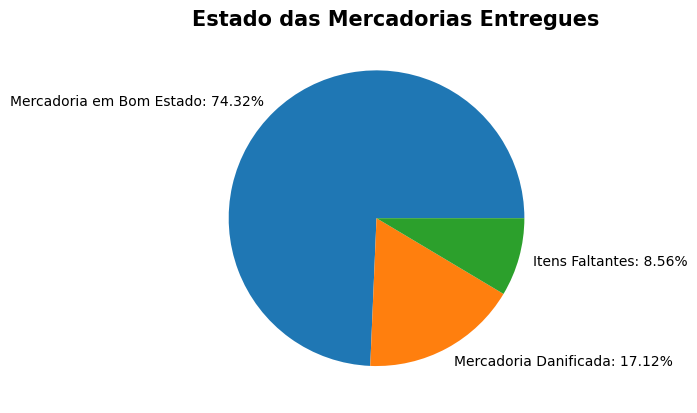

<Figure size 640x480 with 0 Axes>

In [22]:
plt.title("Estado das Mercadorias Entregues", fontsize = 15, loc = 'left', weight='bold')
sns.set_palette('Accent')
etiquetas =  ['Mercadoria em Bom Estado: {:.2%}'.format(entregue_bom_estado),'Mercadoria Danificada: {:.2%}'.format(entregue_danificado),'Itens Faltantes: {:.2%}'.format(entregue_faltante)]
plt.pie(mercadadorias, labels = etiquetas)
plt.figure() 

In [23]:
entregas.head()

,ETA,ATA,Ponto de Partida,Ponto de Destino,Status da Mercadoria,Entrega Realizada?
0,2023-09-05,2023-09-04,Fábrica A,Loja X,Mercadoria em Bom Estado,Sim
1,2023-09-06,2023-09-06,Armazém B,Loja Y,Mercadoria em Bom Estado,Sim
2,2023-09-07,2023-09-05,Fábrica C,Loja Z,Mercadoria Danificada,Sim
3,2023-09-08,2023-09-08,Fábrica D,Armazém X,Mercadoria em Bom Estado,Sim
4,2023-09-09,2023-09-09,Fábrica D,Armazém X,Mercadoria em Bom Estado,Sim


In [24]:
selecao = (entregas['ATA'] > entregas['ETA'])
entregas_atrasadas = entregas[selecao]
entregas_atrasadas.head()

,ETA,ATA,Ponto de Partida,Ponto de Destino,Status da Mercadoria,Entrega Realizada?
15,2023-09-20,2023-09-25,Loja Z,Loja X,Itens Faltantes,Sim
21,2023-09-26,2023-09-27,Loja Y,Fábrica B,Mercadoria Danificada,Sim
23,2023-09-28,2023-09-30,Fábrica A,Armazém Y,Mercadoria Danificada,Sim
76,2023-11-20,2023-12-20,Armazém Y,Loja Z,Mercadoria em Bom Estado,Sim
77,2023-11-21,2023-12-21,Armazém Y,Loja Z,Mercadoria em Bom Estado,Sim


In [25]:
media_atraso = entregas_atrasadas['ATA'] - entregas_atrasadas['ETA']

In [26]:
media_atraso = media_atraso.dt.days.astype(float)

In [27]:
lista_atraso = media_atraso.tolist()
lista_atraso = np.array(lista_atraso)

### # Plotando histograma para verificar a frequência dos atrasos nas entregas já realizadas

Text(0, 0.5, 'Frequência')

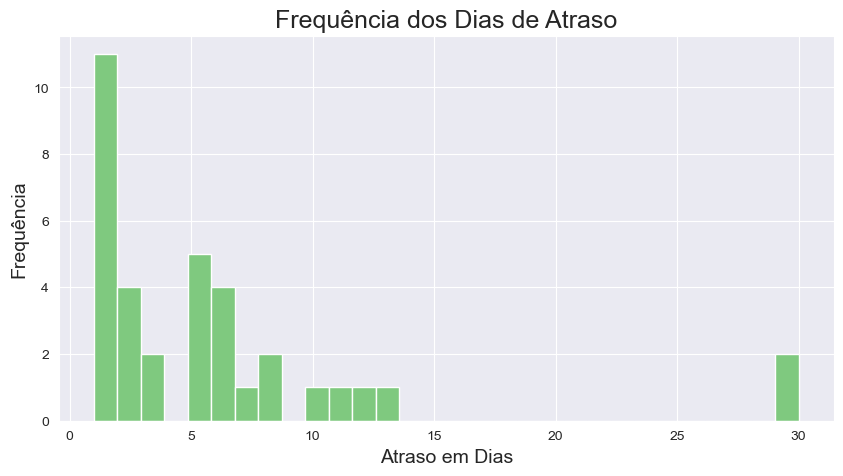

In [28]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
plt.figure(figsize=(10,5))
plt.hist(lista_atraso, bins=30)
plt.title('Frequência dos Dias de Atraso', fontsize = 18)
plt.xlabel('Atraso em Dias', fontsize = 14)
plt.ylabel('Frequência', fontsize = 14)

### # Tabela para verificar a frequência dos atrasos por trecho em todas as entregas (inclusive ainda não finalizadas)

In [29]:
selecao = (entregas['ATA'].isna() | (entregas['ATA'] > entregas['ETA']))
entregas_atrasadas_totais = entregas[selecao]
entregas_atrasadas_totais.groupby(['Ponto de Partida', 'Ponto de Destino']).size().sort_values(ascending=False)

Ponto de Partida  Ponto de Destino
Armazém Z         Loja Y              9
Fábrica C         Armazém Z           5
Armazém Y         Loja X              4
Armazém X         Fábrica C           4
Fábrica B         Fábrica A           4
Fábrica A         Loja Z              3
Loja Y            Armazém X           3
Armazém Y         Armazém X           2
Armazém X         Loja Z              2
Armazém Y         Loja Z              2
Fábrica C         Loja X              2
Loja X            Loja Z              2
Loja Z            Fábrica B           2
Loja X            Loja Y              2
Armazém Z         Loja Z              2
Loja Y            Fábrica B           1
                  Fábrica A           1
Fábrica X         Loja Y              1
Armazém X         Fábrica A           1
Fábrica C         Fábrica A           1
Fábrica B         Loja Z              1
                  Loja X              1
                  Armazém Z           1
                  Armazém Y           1
Fábri

In [30]:
x = pd.DataFrame(entregas_atrasadas_totais.groupby(['Ponto de Partida', 'Ponto de Destino']).size().sort_values(ascending=False))

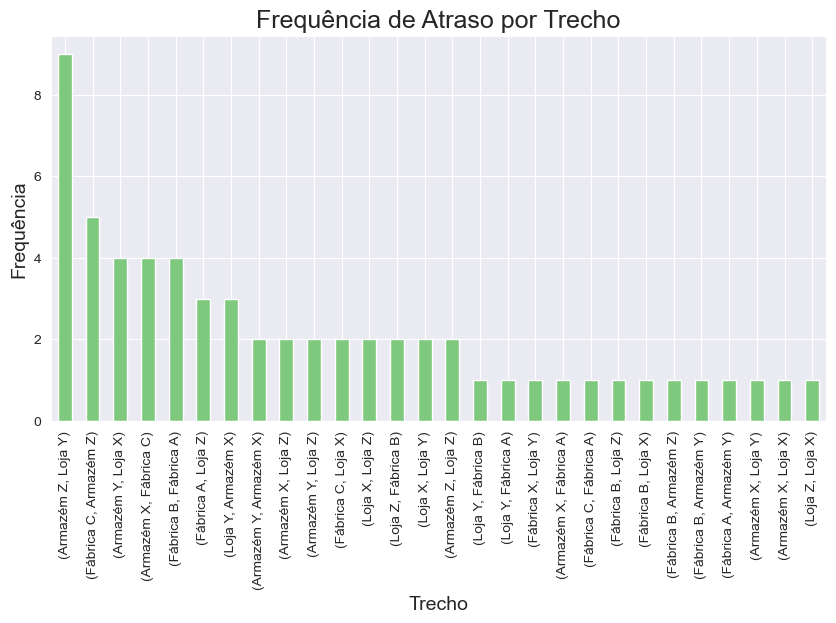

In [31]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
plt.rcParams["figure.figsize"] = (10, 5)
x.plot(kind='bar', legend=False)
plt.xlabel('Trecho', fontsize=14)
plt.ylabel('Frequência', fontsize=14)
plt.title('Frequência de Atraso por Trecho', fontsize=18)
plt.show()

### # Tabela para verificar o total de atrasos por trecho em dias somados

In [32]:
entregas_atrasadas['Atraso Total'] = entregas_atrasadas['ATA'] - entregas_atrasadas['ETA']
atraso_por_trecho = entregas_atrasadas.groupby(['Ponto de Partida', 'Ponto de Destino'])['Atraso Total'].sum().reset_index()
atraso_por_trecho = atraso_por_trecho.sort_values(by='Atraso Total', ascending=False)

C:\Users\User\AppData\Local\Temp\ipykernel_17404\3764307117.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  entregas_atrasadas['Atraso Total'] = entregas_atrasadas['ATA'] - entregas_atrasadas['ETA']


In [33]:
atraso_por_trecho.reset_index(inplace=True)
atraso_por_trecho

,index,Ponto de Partida,Ponto de Destino,Atraso Total
0,3,Armazém Y,Loja Z,60 days
1,4,Armazém Z,Loja Y,20 days
2,0,Armazém X,Fábrica C,15 days
3,14,Loja Y,Armazém X,14 days
4,6,Fábrica A,Loja Z,13 days
5,17,Loja Z,Fábrica B,12 days
6,10,Fábrica C,Loja X,11 days
7,12,Loja X,Loja Y,8 days
8,9,Fábrica C,Armazém Z,8 days
9,1,Armazém Y,Armazém X,6 days


In [34]:
atraso_por_trecho['Atraso Total'].sum()

Timedelta('203 days 00:00:00')

In [35]:
atraso_por_trecho['Atraso Total'][:7].sum()

Timedelta('145 days 00:00:00')

In [36]:
atraso_por_trecho['Atraso Total'][7:].sum()

Timedelta('58 days 00:00:00')

In [37]:
atraso_por_trecho['Atraso Total'][:7].sum() / atraso_por_trecho['Atraso Total'].sum()

0.7142857142857143

## Parte V: Conclusão

### O cálculo do on Time in Full foi de apenas 50.66%, ou seja, bem abaixo do OTIF almejado de 95% de precisão.

### A esse baixo número, podemos associar ao seguintes elementos:

### 1- A maioria dos atrasos são de menos de 4 dias, mas a maior frequência de atrasos ocorre entre os trechos abaixo:

#### Armazém Z - Loja Y: 9              
#### Fábrica C - Armazém Z: 5           
#### Armazém Y - Loja X: 4              
#### Armazém X - Fábrica C: 4           
#### Fábrica B - Fábrica A: 4           

### Mas os atrasos em entregas finalizadas costumam ser mais expressivos nos trechos abaixo, somando quase 30% dos atrasos em dias somados:

#### Armazém Y - Loja Z:	60 days
#### Armazém Z - Loja Y:	20 days
#### Armazém X - Fábrica C:	15 days
#### Loja Y - Armazém X:	14 days
#### Fábrica A - Loja Z:	13 days

### Portanto, seria importante se dar uma atenção maior a esses trechos. 

### 2- Há problema com cerca de 26% das mercadorias entregues, incluindo itens danificados e faltantes. Portanto, seria preciso averiguar o processo de armazenagem e carregamento dessas mercadorias. 